|   iter    |  target   |     x     |
-------------------------------------
| 1         | 0.8198    | 3.109     |
| 2         | 0.746     | 7.775     |
| 3         | 0.9553    | 6.825     |


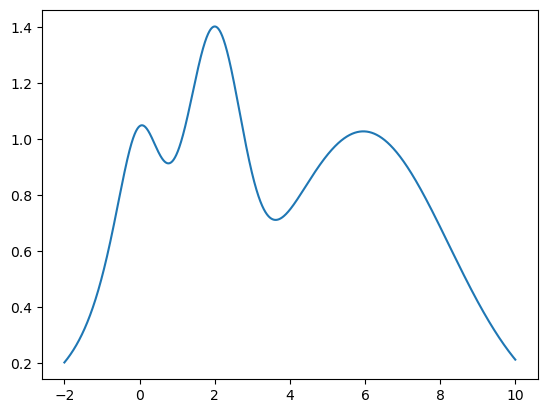

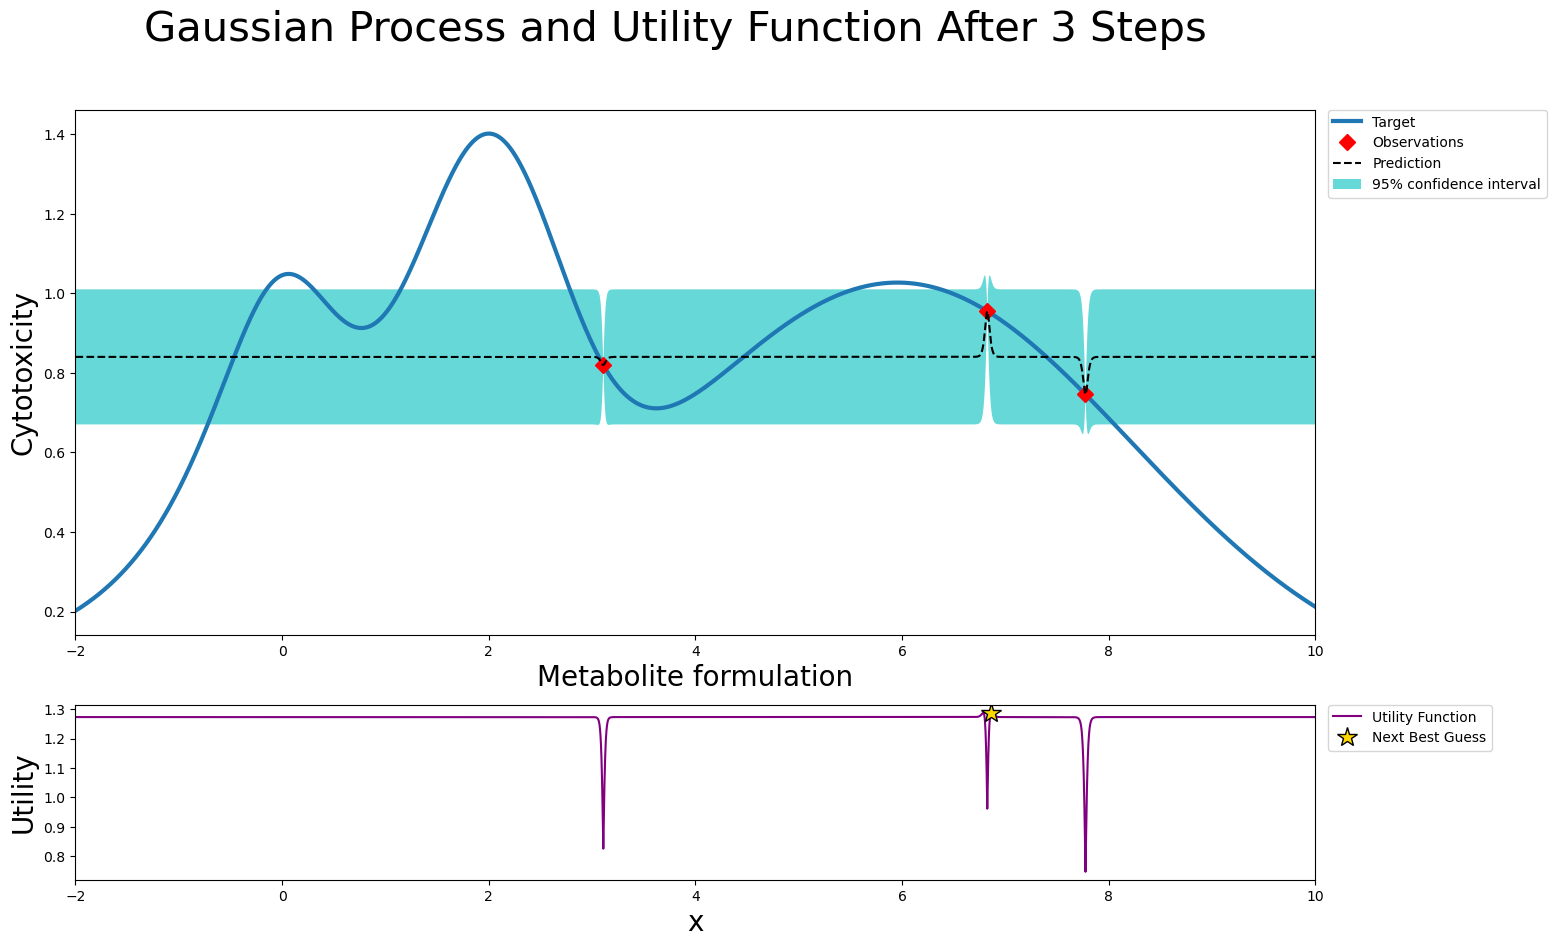

In [3]:
from bayes_opt import BayesianOptimization
from bayes_opt import acquisition
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y)

acquisition_function = acquisition.UpperConfidenceBound(kappa=5.)
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, acquisition_function=acquisition_function, random_state=27)

optimizer.maximize(init_points=3, n_iter=0)

def posterior(optimizer, grid):
    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontsize=30
    )

    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])

    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])

    optimizer.acquisition_function._fit_gp(optimizer._gp, optimizer._space)
    mu, sigma = posterior(optimizer, x)

    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]),
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')

    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('Cytotoxicity', fontdict={'size':20})
    axis.set_xlabel('Metabolite formulation', fontdict={'size':20})


    utility_function = acquisition.UpperConfidenceBound(kappa=5)
    utility = -1 * utility_function._get_acq(gp=optimizer._gp)(x)
    x = x.flatten()

    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15,
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    #acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})

    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)


plot_gp(optimizer, x, y)


|   iter    |  target   |     x     |
-------------------------------------
| 4         | 0.9488    | 6.864     |


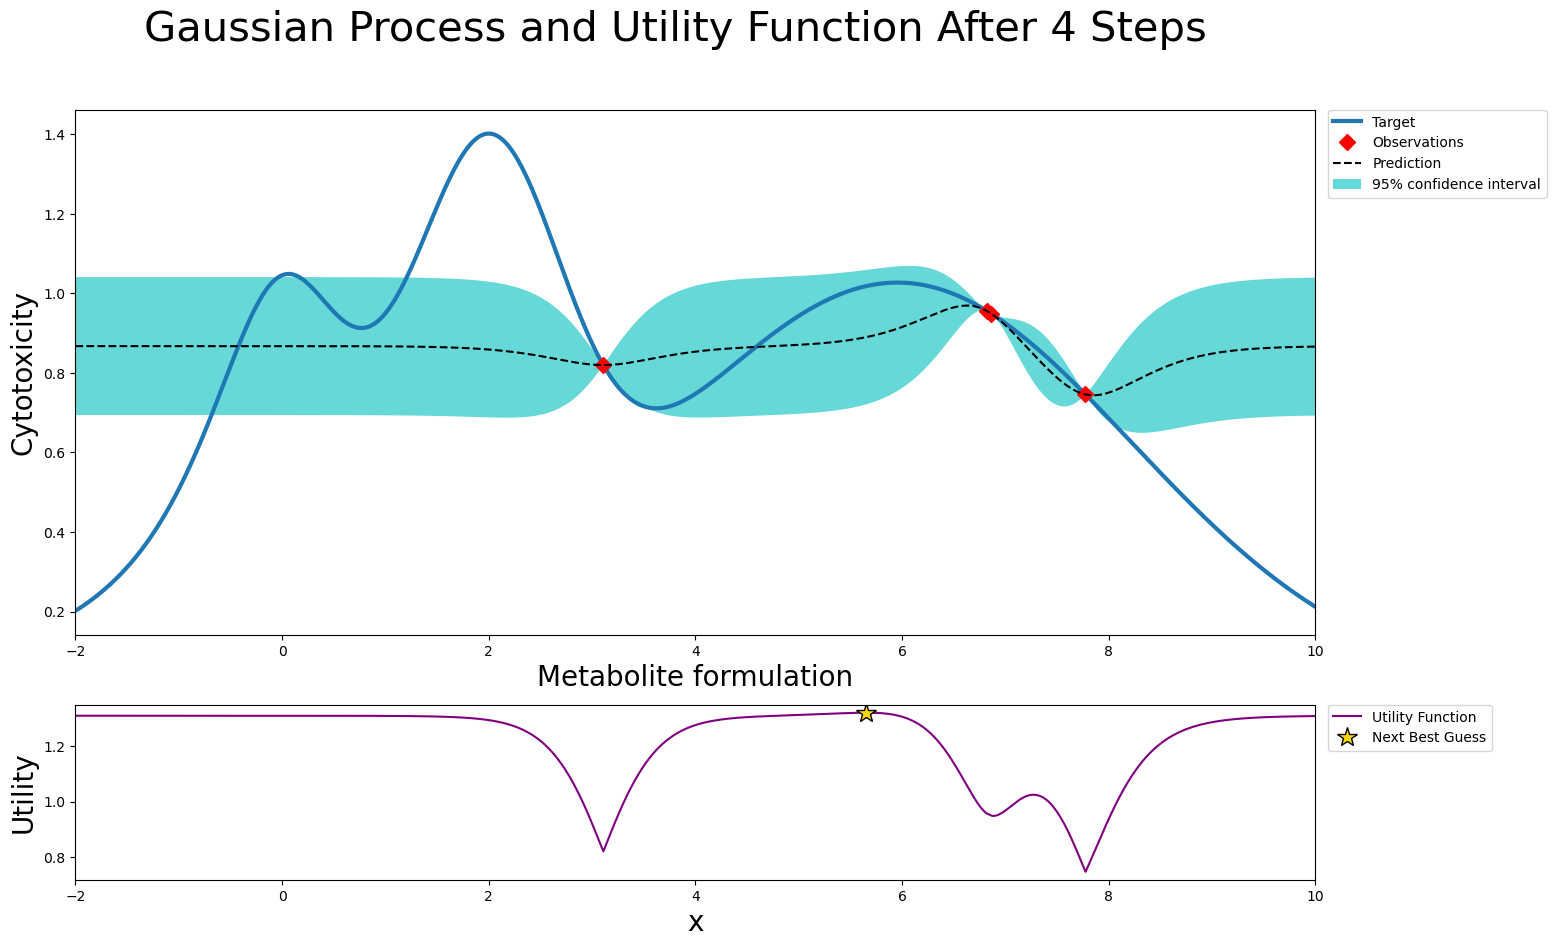

In [4]:
optimizer.maximize(init_points=0, n_iter=1)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 20        | 1.402     | 2.001     |


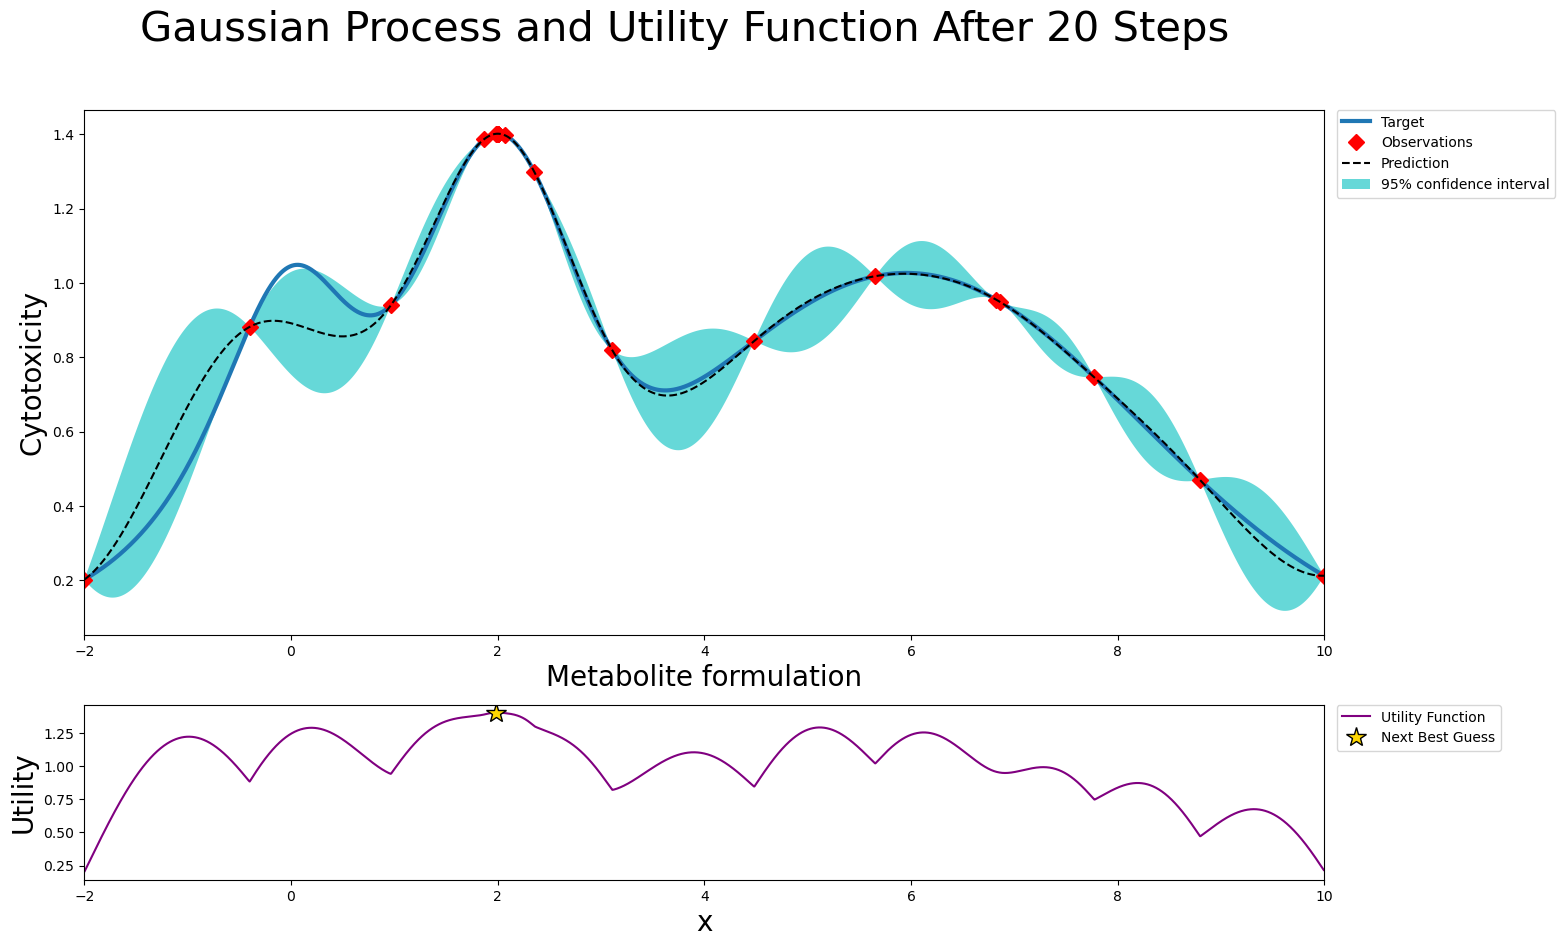

In [20]:
optimizer.maximize(init_points=0, n_iter=1)
plot_gp(optimizer, x, y)

GPyOpt tutorial

In [6]:
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib

def myf(x):
    return (2*x)**2

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]

max_iter = 15

myProblem = GPyOpt.methods.BayesianOptimization(myf,bounds)

myProblem.run_optimization(max_iter)


myProblem.fx_opt

0.0001636679929111357

One dimensional example

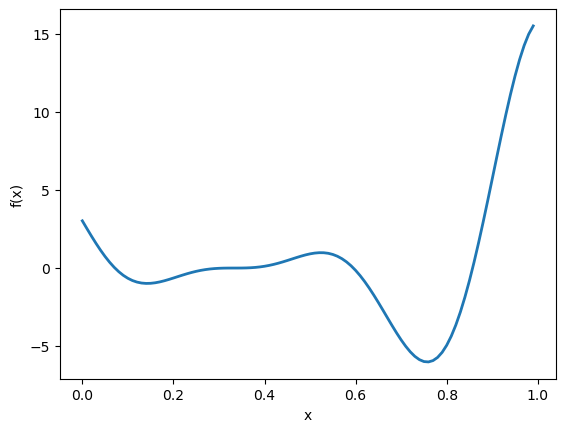

TypeError: _AxesBase._process_unit_info() got an unexpected keyword argument 'xdata'

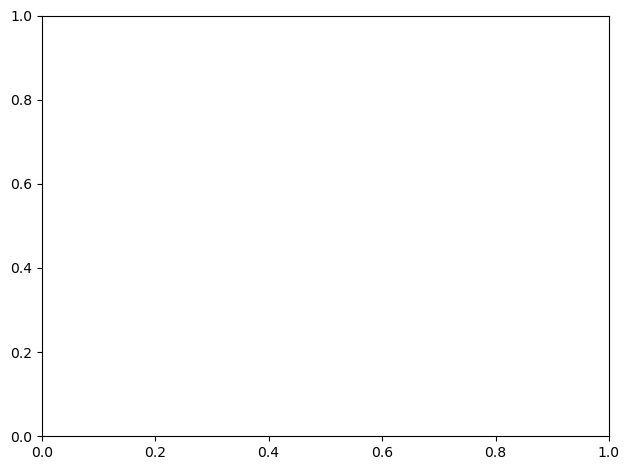

In [15]:
import GPy
import GPyOpt
import matplotlib

# Create the true and perturbed Forrester function and the boundaries of the problem
f_true= GPyOpt.objective_examples.experiments1d.forrester()          # noisy version
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]  # problem constraints 
f_true.plot()

# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f,            # function to optimize       
                                             domain=bounds,        # box-constraints of the problem
                                             acquisition_type='EI',
                                             exact_feval = True) # Selects the Expected improvement

# Run the optimization
max_iter = 15     # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps)   
myBopt.plot_acquisition()
myBopt.plot_convergence()